# 1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


- Fuente original: https://www.kaggle.com/mateuszbuda/lgg-mri-segmentation
- Clickable link for the full list of startups in AI medical imagery: https://research.aimultiple.com/looking-for-better-medical-imaging-for-early-diagnostic-and-monitoring-contact-the-leading-vendors-here/

- In this case study, we will assume that you work as an AI/ML consultant and you have been hired by a medical diagnosis company in NYC.

- You have been tasked to improve the speed and accuracy of detecting and localizing brain tumors based on MRI scans. • This would drastically reduce the cost of cancer diagnosis & help in early diagnosis of tumors which would essentially be a life saver.

- The team has collected brain MRI scans and have approached you to develop a model that could detect and localize tumors.

- You have been provided with 3929 Brain MRI scans along with their brain tumour location.

Full list of startups: https://research.aimultiple.com/looking https://research.aimultiple.com/looking 

Great article by Aditi Mittal, https://aditi-mittal.medium.com/introduction-to-u-net-and-res-net-for-image-segmentation-9afcb432ee2f


![alt text](https://drive.google.com/uc?id=1aq_9XV_rX7DCNXPGMkMh8QLRnMmdDcD_)

## ¿QUÉ ES LA SEGMENTACIÓN DE IMÁGENES?

- El objetivo de la segmentación de imágenes es comprender y extraer información de las imágenes a nivel de píxel.

- La segmentación de imágenes se puede utilizar para el reconocimiento y la localización de objetos, lo que ofrece un valor tremendo en muchas aplicaciones, como imágenes médicas y automóviles autónomos, etc.

- El objetivo de la segmentación de imágenes es entrenar una red neuronal para producir una máscara de pixeles de la imagen.

- Las técnicas modernas de segmentación de imágenes se basane en un enfoque de aprendizaje profundo que hace uso de arquitecturas comunes como RNC, RCT (redes de convolución total) y codificadores-decodificadores profundos.

- Utilizamos la arquitectura ResUNet para resolver la tarea actual.
¿Recuerdas cuándo aplicamos RNC para problemas de clasificación de imágenes? Tuvimos que convertir la imagen en un vector y posiblemente agregar un encabezado de clasificación al final.

- Sin embargo, en el caso de Unet, convertimos (codificamos) la imagen en un vector seguido de un muestreo ascendente (decodificamos) de nuevo en una imagen.

- En el caso de Unet, la entrada y la salida tienen el mismo tamaño, por lo que se conserva el tamaño de la imagen.

- Para RNC clásicas: generalmente se utilizan cuando se necesita clasificar la imagen completa como una etiqueta de clase. Para Unet: se realiza una clasificación a nivel de píxeles.

- U-net formula una función de pérdida para cada pixel de la imagen de entrada.

- La función Softmax se aplica a cada pixel, lo que hace que el problema de segmentación funcione como un problema de clasificación donde la clasificación se realiza en cada pixel de la imagen.

![alt text](https://drive.google.com/uc?id=1UhYwK8wILbDn2DhXExrpZz_i5oXTbIp6)

# 2: IMPORTAR LIBRERÍAS Y DATASETS

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import tensorflow as tf 

import seaborn as sns
import cv2
from skimage import io
import glob
import random

In [2]:
# descargamos el dataset de la pagina del curso: https://frogames.es/masterclass-en-ia-moderna-crea-6-proyectos/
!wget --no-check-certificate \
    https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P96-Section-3-Healthcare-AI.zip \
    -O /tmp/Healthcare-ai.zip

--2022-03-22 18:17:50--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P96-Section-3-Healthcare-AI.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.106.90
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.106.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 641327798 (612M) [application/zip]
Saving to: ‘/tmp/Healthcare-ai.zip’

/tmp/Healthcare-ai. 100%[===================>] 611.62M  46.7MB/s    in 14s     

2022-03-22 18:18:04 (44.2 MB/s) - ‘/tmp/Healthcare-ai.zip’ saved [641327798/641327798]



## diferences using ! vs % in magic lines 
si quiero moverme a un subdirectorio sample_data. Si uso !cdel comando para moverme al subdirectorio e imprimir el directorio actual con pwd, muestra que todavía estoy en el contentdirectorio. Sin embargo, si uso la línea mágica %cd, puedo mantenerme en ese directorio.

[uses of Colab-terminal-commands](https://buomsoo-kim.github.io/colab/2020/05/21/Colab-terminal-commands.md/)

[notebooks IPython-And-Shell-Commands](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.05-IPython-And-Shell-Commands.ipynb#scrollTo=_tk2l2ca8dnE)

[mas comandos en pinterest](https://i.pinimg.com/564x/3e/b3/f2/3eb3f2db1d6abb92ed73f39695c69e6d.jpg)

In [3]:
print("files of dataset directory: ")
# we use % instead of !, because % keeps us in the directory and ! doesnt 
%cd /tmp
print("-"*50)
print("Extracting files the dataset: ")
!unzip -u /tmp/Healthcare-ai.zip
!unzip -u /tmp/Healthcare+AI+Datasets.zip

print("-"*50)
print("\n unpackaged dataset: ")
# if the dyr have spaces you must use ""
!ls "/tmp/Healthcare AI Datasets/Brain_MRI"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: Healthcare AI Datasets/Brain_MRI/TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_31_mask.tif  
  inflating: Healthcare AI Datasets/Brain_MRI/TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_32.tif  
  inflating: Healthcare AI Datasets/Brain_MRI/TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_32_mask.tif  
  inflating: Healthcare AI Datasets/Brain_MRI/TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_33.tif  
  inflating: Healthcare AI Datasets/Brain_MRI/TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_33_mask.tif  
  inflating: Healthcare AI Datasets/Brain_MRI/TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_34.tif  
  inflating: Healthcare AI Datasets/Brain_MRI/TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_34_mask.tif  
  inflating: Healthcare AI Datasets/Brain_MRI/TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_35.tif  
  inflating: Healthcare AI Datasets/Brain_MRI/TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_35_mask.tif  
  inflating: Heal

In [4]:
#brain_df = pd.read_csv('/tmp/Healthcare AI Datasets/Brain_MRI/data.csv')
brain_df = pd.read_csv('/tmp/Healthcare AI Datasets/Brain_MRI/data_mask.csv')
print(brain_df.info())
brain_df.head(1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB
None


,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0


In [5]:
# podemos usar 2 formas de ver el contenido
print(brain_df["mask_path"][1]) # nos regresa la direccion de la imagen en formato .tif, es un equivalente a .jpg
print(brain_df.image_path[1])

TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif
TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif


MINI RETO #1:
  - ¿Tenemos un dataset balanceado? 
  - ¿Cuantas muestras están marcadas como 'paciente sano'?

0    2556
1    1373
Name: mask, dtype: int64


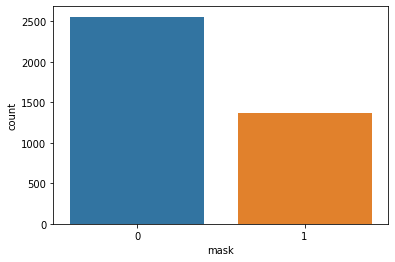

In [6]:
print(brain_df["mask"].value_counts())
sns.countplot(x= "mask", data= brain_df)
# tenemos dataset desbalanceado casi 66% (-) y 33% (+)

#3: VISUALIZACIÓN DE DATOS
## uso de plotly para crear diagramas interactivos


In [7]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(x= brain_df["mask"].value_counts().index, y= brain_df["mask"].value_counts()))
fig.update_traces(marker_color= "rgb(0,0,200)", marker_line_color= "rgb(0,0,255)",
                  marker_line_width= 7, opacity= 0.6)
fig.show()


## skimage y cv2 comparten fucniones 
por ejemplo podemos cargar imagenes usando cualquier libreria, ambos cargan la imagen en forma de array lo unico que cambia es la forma en que lo cargan 
```
cv2.imread(dir) # shape =  (256,256,3)
skimage.io.imread(dir) # shape = (256,256)
```



In [112]:
# primero nos movemos al directorio para agilizar la visualizacion 
%cd "/tmp/Healthcare AI Datasets/Brain_MRI"
#!ls

# reutilizamos el codigo del notebook anterior 
# definimos otra fucnion para imprimir ya sea solo la mascara o solo la imagen 
def plt_img(dataset, data, indice= None, title="" ):
  if indice == None: 
    i  = np.random.randint(0, len(dataset))
  else:
    i = indice
  plt.imshow(cv2.imread(dataset[data][i]))  
  plt.title(title)


/tmp/Healthcare AI Datasets/Brain_MRI


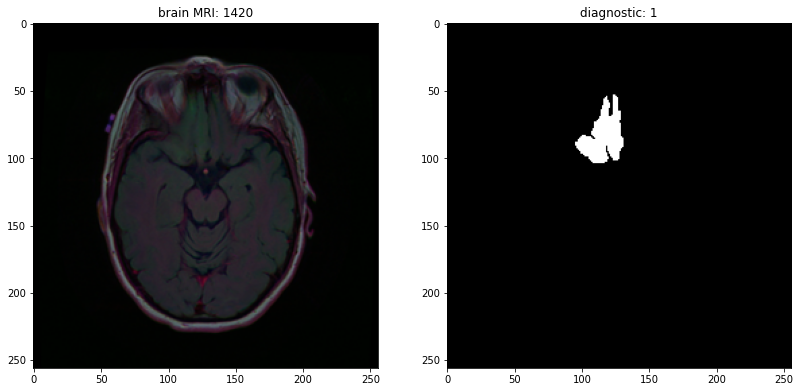

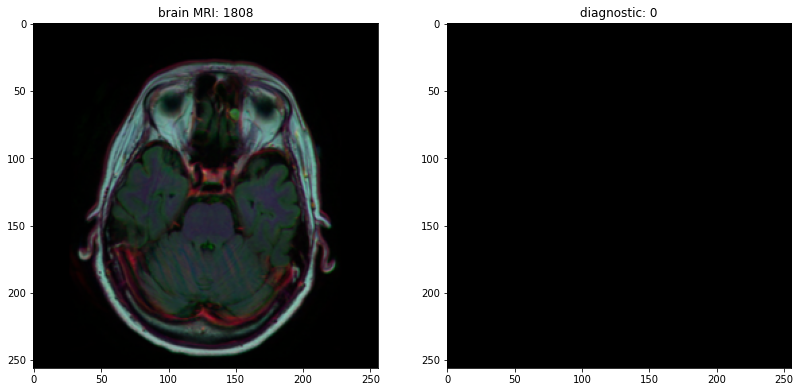

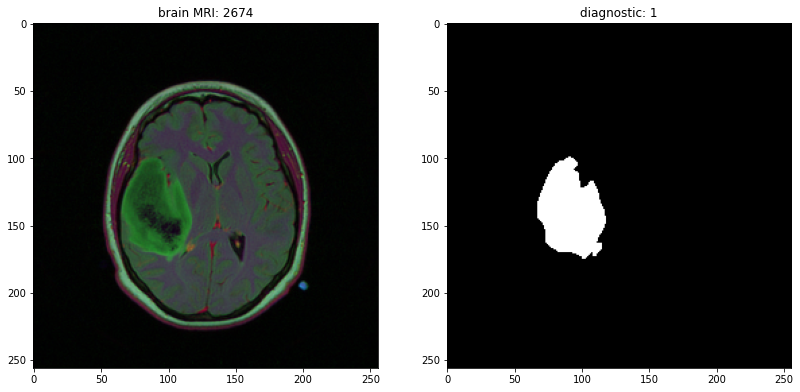

In [114]:
def plt_imgs(n_imgs= None, indices= None): # indices= None
  if n_imgs != None:
    indices= np.random.randint(0, len(brain_df), size=(n_imgs))
  for i in indices:
    nrows, ncols = 1, 3
    size_g = 7
    fig = plt.gcf() 
    fig.set_size_inches(ncols * size_g, nrows * size_g)
    for a in range(1,3):
      sp = plt.subplot(nrows, ncols, a)
      if a == 1:
        plt_img(brain_df, "image_path", i, title= "brain MRI: " + str(i))
      elif a == 2:
        plt_img(brain_df, "mask_path", i, title= "diagnostic: " + str(brain_df["mask"][i]))
    plt.show()
plt_imgs(3)

# MINI RETO #2: 
 - Representar aleatoriamente 12 (1) imágenes de  MRI seleccionadas aleatoriamente de entre los pacientes enfermos seguidas de (2) su correspondiente máscara, (3) tanto la imágen de la MRI junto con su máscara (de color rojo) una encima de la otra.

In [115]:
# cremos una funcion para que imprima la mascara sobre imagen   
def plt_img_2(dataset, indice= None, title=""):
  if indice == None: 
    i  = np.random.randint(0, len(dataset))
  else:
    i = indice
  img = io.imread(dataset["image_path"][i]) # carga la imagen en forma de array (256, 256)
  mascara = io.imread(dataset["mask_path"][i])
  """esta es la linea especial en la cual crearemos una nueva imagen remplazando 
     un pixel rojo (255,0,0) en la misma posicion donde el pixel de la mascara == 255
     es necesario el mismo shape de img y mascara """
  img[mascara == 255] = (255,0,0)# usamos un indexado fancy de numpy para 
  plt.title(title)
  plt.imshow(img)





In [117]:
def plt_imgs_2(n_imgs= None, indices= None):
  if n_imgs != None:
    indices= np.random.randint(0, len(brain_df), size=(n_imgs))
  for i in indices:
    nrows, ncols = 1, 3
    size_g = 5
    fig = plt.gcf() 
    fig.set_size_inches(ncols * size_g, nrows * size_g)
    for a in range(1,4):
      sp = plt.subplot(nrows, ncols, a)
      if a == 1:
        plt_img(brain_df, "image_path", i)
      elif a == 2:
        plt_img(brain_df, "mask_path", i)
      elif a == 3:
        plt_img_2(brain_df, i, title="brain MRI: " + str(i) + ", diagnostic: " + str(brain_df["mask"][i]))
    plt.tight_layout() # para que se ajuste al tamaño 
    plt.show()

 # utilizando el enmascarado (= indexado fanci ) del dataframe podemos seleccionar unciacmente las muestras positivas
positivos_df = brain_df[brain_df["mask"]== 1]
index_positives  = positivos_df.index[0:12] # seleccionamos los indices positivos 
plt_imgs_2(indices= index_positives)

Output hidden; open in https://colab.research.google.com to view.

# 4: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LAS REDES NEURONALES Y RESNETS CONVOLUCIONALES
esta parte la repasamos en el modulo anterior asi que aqui solo dejo unos link de apoyo. 

- Feature Extraction and Convolutions: https://setosa.io/ev/image-kernels/
- CNN Visualization: https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

- Link al paper de ResNets (Deep Residual Learning for Image Recognition): https://arxiv.org/pdf/1512.03385.pdf


- Un conjunto de estas redes residuales alcanza un error del 3,57%
en el conjunto de test de ImageNet.

- Solución (buen artículo de Siddharth Das): https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5

# 5: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL APRENDIZAJE POR TRANSFERENCIA (Fine tuning)
El aprendizaje por transferencia es una técnica de aprendizaje automático en la que una red que ha sido entrenada para realizar una tarea especifica se reutiliza como punto de partida para otra tarea similar.
Si está entrenando un nuevo modelo para un dominio de problema relacionado, o tiene una cantidad mínima de datos para el entrenamiento, el aprendizaje de transferencia está aquí para ahorrarle tiempo y energía.

 - transferir el conocimiento de un modelo a otro es de los mas impresionante ya que se asemeja a que queramos nosotros transfirieramos la conciencia de einstein a nosotros. el fine tuning y el conbinar redes neuronales es lo que nos puede llevar a una GAI. 
 
## Methods for transfer learning
first of all, we have to know the baiscs of how a DL model represents the knowledge, the first layers saves general knowelde exapl. first layers of CNN learn general knowedge; and as we advance forward the layers learn more complex an especific information. textures, edges > figures > shapes > parts objects  > objects. the method of TL will depends of the similarity of problem domains. clasify apples and pear are similar, but apples and cars are distants. 
- Feature transfer (we just train the output layer): The idea behind feature transfer is then to use the input and feature-extraction layers that have been trained with a given data set (with their weights and structure frozen) and train a new classification layer for the related problem domain. This method is ideal if the two problem domains are similar.
- Fine-tuning (we train the output layer and some hidden layers): 
This fine-tuning could mean that we train the later layers of the deep learning network (meaning adjust the weights based upon the classification error) while leaving the earlier layers frozen. In this way, we fine-tune the layers that are more specific to features of the classification task (compared to earlier layers, which are more generic). This method is ideal when the problem domains have some distance, requiring new features to be classified.
- Using a pre-trained model: Using a pre-trained model, the model can be refined through feature transfer (train the classification layer) or by freezing some of the early convolutional layers and retraining the later ones. This strategy is ideal if the problem domains are similar (with additional work in either feature transfer or in fine-tuning with additional training data).

https://developer.ibm.com/articles/transfer-learning-for-deep-learning/







![alt text](https://drive.google.com/uc?id=1fnfO27T6vlR0rWTPj41sm5fDwZXXo0Gs)
* Pasos de la estrategia nº1:

  - Congelar los pesos de la red RNC entrenada de las primeras capas.

  - Entrenar solo las capas densas recién agregadas (con pesos inicializados aleatoriamente).

- Pasos de la estrategia nº2: 
  - Inicializar la red de RNC con los pesos previamente entrenados
  - Volvemos a entrenar a toda la RNC mientras establece la tasa de aprendizaje para que sea muy pequeña, esto es fundamental para garantizar que no cambie agresivamente los pesos entrenados.

- Las ventajas del aprendizaje por transferencia son: 
  - Proporciona un progreso de entrenamiento rápido, no tiene que empezar desde cero utilizando pesos inicializados aleatoriamente

  - Se puede utilizar un pequeño conjunto de datos de entrenamiento para lograr resultados increibles

## lo fabulosos del aprendisaje por transferencia 
- reduce drasticamente el tiempo de entrenamiento 
- si tienes un modelo que fue entrenado para reconocer distintos tipos de imagens (dataset muy general) puede ser aplicado a un problema muy especifico. 
- si tienes quieres crear un modelo para detectar kiwis podridos, pero no tienes muchas imagenes de kiwis pero de manzanas si, puedes crear un modelo con las manzanas y despues hacer TL con el kiwi, ya que las categorias estan muy relacionadas. 
## problemas del TL:
- La **transferencia negativa** ocurre cuando el aprendizaje por transferencia afecta negativamente al modelo. Esto ocurre cuando las características de las tareas nuevas y antiguas no están relacionadas.
- **Límites de transferencia**: medir la cantidad de conocimiento transferido es crucial para garantizar la calidad y solidez del modelo

# 6: ENTRENAR UN MODELO CLASIFICADOR PARA DETECTAR SI EXISTE TUMOR O NO


## crear las variables X_train y Y_train
En este punto te daras cuenta que hay 2 formas de crear las variables que se le suministraran al modelo. 
1. convertir los datos en arrays: es lo que generalmente realizamos por. ejemplo clasificacion de imagenes X_train = (n_samples, 96, 96, 3), Y_train = (n_samples, N_categories(formato one hot encoding)) para calisficacion o para regresion, Y_train = (n_samples, n_variables_to_predict)
2. convertir las variables de entrada y salida a formato image_data_generator, hay 3 formas de suministrar los datos al imagedataGEn:
  - desde un directorio 
  - desde eun array (como los de atras)
  - desde un dataframe que especifica las direcciones de cada imagen 

este es una pagina que da una descripcion completa, abarcadno todo.
https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

more info about keras-flow-from-dataframe: 
https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c

In [12]:
# Eliminamos la columna de identificador del paciente
brain_df_train = brain_df.drop(columns = ["patient_id"])

In [13]:
# Convertir los datos en la columna de máscara a formato de string, para usar el modo categórico en flow_from_dataframe
# Verás este mensaje de error si comentad la siguiente línea de código:
# TypeError: If class_mode="categorical", y_col="mask" column values must be type string, list or tuple.
brain_df_train["mask"] = brain_df_train["mask"].apply(lambda x: str(x))
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [14]:
# Dividir los datos en entrenamiento y testing
from sklearn.model_selection import train_test_split
# si le damos un solo objeto(y no X y Y) el objeto particionara el array o dataset con la proporcion dada

train, test = train_test_split(brain_df_train, test_size= 0.15)

In [15]:
# Creamos el generador de imágenes
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(validation_split=.15, rescale=1./255)



In [16]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train, # dataframe with the directories of images 
    directory="./", # where you must be to acces to the directories of the df 
    x_col="image_path",
    y_col="mask", # you should pass the name of the column which contains the class names must be str (then it woul be pass to one hot encoding format )
    subset="training", # we specify 2 datagen "validation_split=.15" it is for train 
    batch_size=16,
    shuffle= True, # shuffle the samples 
    class_mode="categorical",
    target_size=(256,256))


valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train, 
    directory="./", 
    x_col="image_path",
    y_col="mask",
    batch_size=16,
    subset="validation",
    shuffle= True, 
    class_mode="categorical",
    target_size=(256,256))

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test, 
    directory="./", 
    x_col="image_path",
    y_col="mask",
    batch_size=16,
    shuffle=False, # si no activamos false, tendremos problemas en el cap 7 usando accuracy_score
    class_mode="categorical",
    target_size=(256,256))

Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


## descargamos el modelo RESNET50 de google con los pesos ya entrenados para imagenet


In [17]:
# descargamos el modelo base 
resnet50_trained = tf.keras.applications.resnet50.ResNet50(
    weights="imagenet", # indica el dataset con el que fue entrenada
    include_top= False, # ya esta diseñado para hacer TL, por eso te pregunta si incluyes la ultima capa 
    input_tensor= tf.keras.layers.Input(shape=(256, 256, 3))) # indicamos la capa de entrada 

print(resnet50_trained.summary())    

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

## creamos la aquitectura basada en TL Fine-tuning
esto significa que la resnet50 entrenada no se entrenara en la fase de trainig, pero añadiremos una cabacera(ultimas capas de la red) que se podran entrenar y asi predecir con mejor exactitud a las nuevas categorias 

In [18]:
# Congelamos los pesos del modelo
for layer in resnet50_trained.layers:
  layer.trainable = False

In [19]:
# Agregamos una cabecera de clasificación al modelo base
x_output = resnet50_trained.output
x_output = tf.keras.layers.AveragePooling2D(pool_size= (4,4))(x_output)
x_output = tf.keras.layers.Flatten(name= 'flatten')(x_output)
x_output = tf.keras.layers.Dense(256, activation = "relu")(x_output)
x_output = tf.keras.layers.Dropout(0.3)(x_output)
x_output = tf.keras.layers.Dense(256, activation = "relu")(x_output)
x_output = tf.keras.layers.Dropout(0.3)(x_output)
x_output = tf.keras.layers.Dense(2, activation = 'softmax')(x_output)

model_1 = tf.keras.models.Model(inputs = resnet50_trained.input, outputs = x_output) #juntamos toda la arquitectura indicando su input y output final

model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [20]:
# Compilamos el modelo

model_1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

# Utilizamos la parada temprana para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Guardamos el mejor modelo con la menor pérdida de validación
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
# entrenamos 
%%time

history_1 = model_1.fit(
    train_gen,
    steps_per_epoch= train_gen.n // 16, # esto indica que se daran 16 lotes de 2839 // 16 = 177 muestras en cada epoca
    epochs = 3, 
    validation_data= valid_gen,
    validation_steps= valid_gen.n // 16,
    callbacks=[checkpointer, earlystopping])

Epoch 1/3
177/177 [==============================] - ETA: 0s - loss: 0.7433 - accuracy: 0.6174
Epoch 1: val_loss improved from inf to 0.64051, saving model to classifier-resnet-weights.hdf5
177/177 [==============================] - 667s 4s/step - loss: 0.7433 - accuracy: 0.6174 - val_loss: 0.6405 - val_accuracy: 0.6250
Epoch 2/3
 39/177 [=====>........................] - ETA: 7:21 - loss: 0.6644 - accuracy: 0.6520

KeyboardInterrupt: ignored

In [24]:
# Guardamos la arquitectura del modelo en un archivo json para uso futuro

model_json = model_1.to_json()
with open("classifier-resnet-model.json","w") as json_file:
  json_file.write(model_json)

In [21]:
nrows, ncols = 1, 4
size_g = 6
fig = plt.gcf() 
fig.set_size_inches(ncols * size_g, nrows * size_g) 

for i, n in enumerate(history_1.history.keys()):
  sp = plt.subplot(nrows, ncols, i+1)    
  plt.plot(history_1.history[n], 'r', )
  plt.xlabel('epochs')
  plt.ylabel(n)


NameError: ignored

<Figure size 1728x432 with 0 Axes>

# 7: EVALUA EL RENDIMIENTO DEL MODELO ENTRENADO

## comparamos la red del curso vs la que yo entrené
En resumen usamos la misma arquitectura(de hecho yo use una capa mas dense y dropout), aun asi tenemos una diferencia en la evulacion de 0.98 vs 0.67, esto puede deberse a varias razones:
- se realizo un ajuste de hiperparametros en el modelo 
- se entreno durante mas epocas 


In [25]:
# cargamos el modelo que nosotros entrenamos con los mejores weights
with open('/tmp/Healthcare AI Datasets/Brain_MRI/classifier-resnet-model.json', 'r') as json_file:
    json_savedModel= json_file.read()
model_1 = tf.keras.models.model_from_json(json_savedModel)
model_1.load_weights('/tmp/Healthcare AI Datasets/Brain_MRI/classifier-resnet-weights.hdf5')
model_1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])


OSError: ignored

In [21]:

# cargamos el modelo que que el profesor creo con los mejores weights
with open('/tmp/Healthcare AI Datasets/Brain_MRI/resnet-50-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()
model_1_trained = tf.keras.models.model_from_json(json_savedModel)
model_1_trained.load_weights('/tmp/Healthcare AI Datasets/Brain_MRI/weights.hdf5')
model_1_trained.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [28]:
model_1_trained.summary()
#model_1.shape

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
%%time
model_1.evaluate(test_gen, steps = test_gen.n // 16, verbose =1)

In [31]:
%%time
model_1_trained.evaluate(test_gen, steps = test_gen.n // 16, verbose =1)

36/36 [==============================] - 129s 4s/step - loss: 0.0708 - accuracy: 0.9844
CPU times: user 3min 10s, sys: 2.26 s, total: 3min 12s
Wall time: 2min 9s


[0.07079774886369705, 0.984375]

## podemos sustituir evaluate por predict + accuracy_score)
si bien podemos evaluar directamente la eficacia del modelo usando el metodo evaluated, es indispensable aprender a hacerlo de forma manual ya que asi entendemos que nos arroja la red y como lo podemos comparar con los resultados reales. 

In [32]:
%%time
test_predict = model_1_trained.predict(test_gen, steps = test_gen.n // 16, verbose =1)

36/36 [==============================] - 132s 4s/step
CPU times: user 3min 8s, sys: 1.99 s, total: 3min 10s
Wall time: 2min 23s


In [33]:
print(test_predict.shape)
print(test_predict[0:4])

(576, 2)
[[9.9612421e-01 3.8757683e-03]
 [1.0000000e+00 1.2148148e-11]
 [6.7247511e-06 9.9999332e-01]
 [1.0000000e+00 2.0515806e-08]]


In [34]:
predict = []
for p in test_predict:
  predict.append(str(np.argmax(p))) # convertimos a str para poder usar en accuracy_score
predict = np.array(predict)
print(predict.shape, predict[0:50])

(576,) ['0' '0' '1' '0' '0' '1' '1' '1' '1' '1' '0' '1' '1' '0' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1']


In [35]:
 # no tomamos las 590 imagenes totales de test, ya que predict solo evalup hasta el 576 debido al tamaño del lote 
Y_real = np.array(test["mask"])[:len(predict)]
print(Y_real.shape, Y_real[0:50])
print("[total negativos, total positivos]: ", np.bincount(Y_real.astype(int)))

(576,) ['0' '0' '1' '0' '0' '1' '1' '1' '1' '1' '0' '1' '1' '0' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1']
[total negativos, total positivos]:  [362 214]


In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_real, predict)
accuracy

0.984375

## creamos la matriz de confusion e informe de clasificación


[[360   2]
 [  7 207]]


Text(69.0, 0.5, 'Y_true')

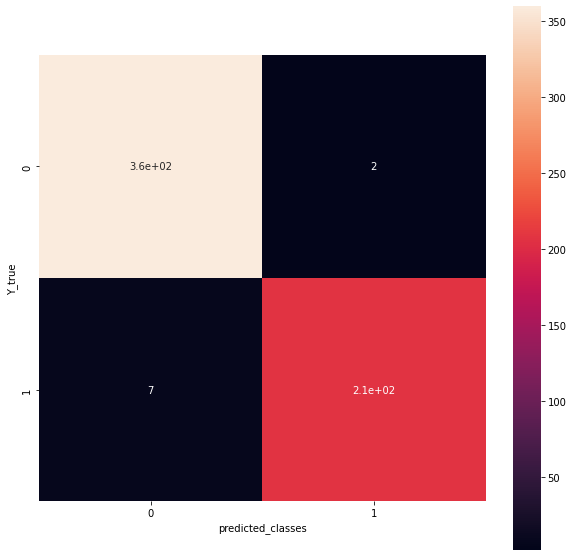

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true= Y_real, y_pred= predict)
print(cm)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot=True, square=True) # cmap='coolwarm'
plt.xlabel('predicted_classes')
plt.ylabel('Y_true')

In [38]:
from sklearn.metrics import classification_report

report = classification_report(Y_real, predict, labels = ["0","1"])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       362
           1       0.99      0.97      0.98       214

    accuracy                           0.98       576
   macro avg       0.99      0.98      0.98       576
weighted avg       0.98      0.98      0.98       576



# 8: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LOS MODELOS RESUNET
- La arquitectura ResUNet combina la arquitectura de la red troncal UNet con bloques residuales para superar los problemas de desvanecimiento de gradientes en las arquitecturas profundas. 
- La arquitectura de Unet se basa en redes totalmente convolucionales y se modifica de manera que funcione bien en las tareas de segmentación.

- Resunet consta de tres partes:

  -  (1) Codificador o ruta de contratación (2) Cuello de botella .

  - (3) Decodificador o ruta expansiva


## auotencoders vs U-nets
- auotencoders: la informacion se comprime de forma lineal lo que crea un cuello de botella en el que crea una perdida de informacion.  autoencoders are used for some other task like reconstructions, generation, denoising, and so on.
- U-Net: el codificador y decodificador son simetricos lo que nos permite colocar skip conections que evitan la perdida de informacion en el cuello de botella. U-net is used for a specific task like segmentation






![alt text](https://drive.google.com/uc?id=1dEqVh2vxL1KBvA2gIM9XgBySDW31m34z)

1. El codificador o ruta de contratación consta de 4 bloques:

  - El primer bloque consta de una capa de convolución 3x3 + Relu + Normalización por lotes

  -  Los tres bloques restantes consisten en bloques Res seguidos de un max pooling de tamaño 2x2.

2. Cuello de botella:

  -  Está entre el camino de la contracción y la expansión.

  - Consiste en un bloque Res seguido de una capa convolucional de upsampling de amaño 2x2.

3. La ruta de expansión o decodificador consta de 4 bloques:

  - Los 3 bloques siguientes al cuello de botella consisten en bloques de Res seguidos por una capa convolucional de upsampling de tamaño 2 x 2

  - El bloque final consta de un Res-block seguido de una capa de convolucional de 1x1.

# 9: CONSTRUIR UN MODELO DE SEGMENTACIÓN PARA LOCALIZAR EL TUMOR



## crear las variables X_train y Y_train usando solo casos postivos 



In [24]:
# usadno una indexacion fancy seleccionamos solo las muestras positivas a cancer (que tienen mascara)
brain_df_mask = brain_df[brain_df["mask"] == 1]
print("positive cancer samples: ", brain_df_mask.shape)
brain_df_mask.head()

positive cancer samples:  (1373, 4)


,patient_id,image_path,mask_path,mask
445,TCGA_DU_5872_19950223,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5.tif,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5_...,1
507,TCGA_DU_5874_19950510,TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_5.tif,TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_5_...,1
551,TCGA_DU_5854_19951104,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_6.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_6_...,1
555,TCGA_DU_5854_19951104,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_6.tif,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_6_...,1
617,TCGA_DU_5853_19950823,TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_6.tif,TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_6_...,1


## hacemos el split 

In [25]:
X_train, X_val = train_test_split(brain_df_mask, test_size= 0.15)
X_val, X_test = train_test_split(brain_df_mask, test_size= 0.5)

In [26]:
# cargamos los datos a variables 
train_img = list(X_train.image_path)
train_mask =  list(X_train.mask_path)

val_img = list(X_val.image_path)
val_mask =  list(X_val.mask_path)

## creamos 1 datagenerator que suministre X y Y al modelo(descargado de github)
el archivo utilities.py esta en los recursos del curso. 

este datagen funciona de una  forma parecida al de keras: 
- keras.ImageDataGenerator: apartir de un dataframe recibe una lista de directorios y otra con llista de categorias y crea  un iterador con las variables X y Y para suministrar al modelo:
  - X= imagenes 
  - Y= categorias (str)
- utilities.DataGenerator: a partir de listas de directorios de imagenes crea  un iterador con las variables X y Y para suministrar al modelo:
  - X= imagenes 
  - Y= imagenes 
como vemos keras.ImageDataGenerator solo sirve cuando Y es una categoria, pero no cuando Y es una imagen 

In [27]:
# usaremos un datagenerator que se obtuvo de github para creadr un iterador para que le de las imagenes al modelo
from utilities import DataGenerator

training_gen_git = DataGenerator(train_img, train_mask)

validation_gen_git = DataGenerator(val_img, val_mask)




In [28]:
training_gen_git = DataGenerator(train_img, train_mask)

prueba_1 = DataGenerator(train_img, train_mask)
prueba_1 = prueba_1.__getitem__(1)
#prueba_1 = np.array(prueba_1[0])
#print(prueba_1.shape)

print(type(prueba_1[0][0][0][0][0]))
#prueba_2 = np.array(prueba_1[1])
print(type(prueba_1[1][0][0][0][0]))


"""plt.imshow(prueba_1[2])
plt.show()"""



<class 'numpy.float64'>
<class 'numpy.int64'>


'plt.imshow(prueba_1[2])\nplt.show()'

## construimos el modelo 
crearemos 2 funciones para agilizar la constuccion de la arquitectura: 
- block_res: creara un bloque residual que comprimira varias capas de la arquitecturaque tienen skip conections.

Crearemos el bloque res bassados en esta documentacion. Más sobre esto en: https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

- upsample_concat: unira las skpiconections, que hay en el upsampling.
 
### iniciarlizador he_normal 
usaremos he_normal que nos permitira converger mas rapido dado al problema a resolver.
Más acerca de he_normal: https://medium.com/@prateekvishnu/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528





In [29]:
# creamos la funcion que defina un bloque residual de convolucion 
def res_block_conv(X, filters):
  copy_X = X

  # long path
  X= tf.keras.layers.Conv2D(filters,
                            kernel_size = (1,1),
                            strides = (1,1),
                            kernel_initializer ='he_normal')(X)
  X= tf.keras.layers.BatchNormalization()(X)
  X=  tf.keras.layers.Activation("relu")(X)

  X= tf.keras.layers.Conv2D(filters,
                            kernel_size = (3,3),
                            strides = (1,1),
                            padding = 'same', # el no pading impide que se modifique el tamaño del mapa de caracteristicas
                            kernel_initializer ='he_normal')(X)
  X= tf.keras.layers.BatchNormalization()(X)

  # short path
  copy_X= tf.keras.layers.Conv2D(filters,
                            kernel_size = (1,1),
                            strides = (1,1),
                            kernel_initializer ='he_normal')(copy_X)
  copy_X= tf.keras.layers.BatchNormalization()(copy_X)

  # join the short and long path
  X= tf.keras.layers.Add()([X,copy_X])
  X= tf.keras.layers.Activation("relu")(X)
  return X


In [31]:
# creamos la funcion que una las skipcon + upsampling_X
def upsample_concat(x_, skip):
  x_ = tf.keras.layers.UpSampling2D((2,2))(x_)
  #print(x_.shape, skip.shape)
  merge= tf.keras.layers.Concatenate()([x_,skip]) # Concatenate es diferente de Add
  return merge

In [32]:
# creamos la arquitectura 
input_shape= (256,256,3)

# creamos la capa de entrada 
X_input = tf.keras.layers.Input(input_shape)

"""downsampling encoder"""
# fase 1 | -4
conv_1 = tf.keras.layers.Conv2D(16,
                           3, # kernel size
                           activation="relu",
                           padding = 'same',
                           kernel_initializer ='he_normal')(X_input)
conv_1= tf.keras.layers.BatchNormalization()(conv_1)

conv_1= tf.keras.layers.Conv2D(16,
                           3, 
                           activation="relu",
                           padding = 'same',
                           kernel_initializer ='he_normal')(conv_1)
conv_1= tf.keras.layers.BatchNormalization()(conv_1)
pool_1 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv_1)


# fase 2 | -3
conv_2 = res_block_conv(pool_1, 32)
pool_2 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv_2)

# fase 3 | -2
conv_3 = res_block_conv(pool_2, 64)
pool_3 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv_3)

# fase 4 | -1
conv_4 = res_block_conv(pool_3, 128)
pool_4 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv_4)

"""bottle neck"""
# fase 5 | 0
conv_5 = res_block_conv(pool_4, 256)

"""upsampling decoder"""
# fase 6 | 1 

up_1 = upsample_concat(conv_5, conv_4)
up_1 = res_block_conv(up_1, 128)

# fase 7 | 2
up_2 = upsample_concat(up_1, conv_3)
up_2 = res_block_conv(up_2, 64)

# fase 8 | 3
up_3 = upsample_concat(up_2, conv_2)
up_3 = res_block_conv(up_3, 32)

# fase 9 | 4
up_4 = upsample_concat(up_3, conv_1)
up_4 = res_block_conv(up_4, 16)

# fase de salida
output = tf.keras.layers.Conv2D(1,
                           1, # kernel size
                           activation="sigmoid",
                           padding = 'same')(up_4)

model_unet = tf.keras.Model(inputs = X_input, outputs= output)

In [46]:
model_unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                           

# 10: ENTRENAR UN MODELO DE RESUNET DE SEGMENTACIÓN PARA LOCALIZAR EL TUMOR
1. definimos el optimizador (ADAM) y una funcion de coste especial 


## Función de pérdida tversky:

Necesitamos una función de pérdida personalizada para entrenar este ResUNet. Por lo tanto, hemos utilizado la función de pérdida tal como se ve en https://github.com/nabsabraham/focal-tversky-unet/blob/master/losses.py
En la funcion de perdida ponderara el acierto en cada fila y columna y va sacando falsos positivos a nivel de pixel. 
 El archivo de utilidades contiene el código para la función de pérdida personalizada y el generador de datos personalizados
 2. definmos las callbacks [early_stop, checkpointer]
 3. compilamos el modelo
 4. entrenamos el modelo
 5. guardamos el modelo

In [33]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                 mode='min', 
                                                 verbose=1, 
                                                 patience=20) # patience esta dado en epocas 

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="segmentation_ResUNet-weights.hdf5", 
                                                  verbose=1, 
                                                  save_best_only=True)


## error con la funcion de coste 
al hacer las cosas tal cual indicaba el tutorial nos salia el siguiente problema 

```
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/tmp/Healthcare AI Datasets/Brain_MRI/utilities.py", line 218, in focal_tversky  *
        pt_1 = tversky(y_true, y_pred)
    File "/tmp/Healthcare AI Datasets/Brain_MRI/utilities.py", line 208, in tversky  *
        true_pos = K.sum(y_true_pos * y_pred_pos)

    TypeError: Input 'y' of 'Mul' Op has type float32 that does not match type int64 of argument 'x'.
```
si rastreabamos el origen  del problema nos llevaba a la funcion tversky, y nos decia que la variable "y_true_pos" debia ser float32 (era mas coherente pasar de int > float, que cambiar la otra variable de float  > int ). investigue en. https://stackoverflow.com/questions/43338851/input-y-of-mul-op-has-type-float32-that-does-not-match-type-int32-of-argumen
y me dijo que simplemente cambiara el typo de dato:



```python
    y_true_pos = tf.cast(y_true_pos, tf.float32) # convertimos y_true_pos a float32

```








In [34]:
adam = tf.keras.optimizers.Adam(learning_rate=0.05, epsilon = 0.1) # lr y epsilon seran adaptados automaticamente 

from utilities import focal_tversky, tversky_loss
import tensorflow.keras.backend as K

def tversky(y_true, y_pred, smooth = 1e-6):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    
    y_true_pos = tf.cast(y_true_pos, tf.float32) # convertimos y_true_pos a float32
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

def focal_tversky(y_true,y_pred):
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)

model_unet.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])




In [160]:
history_3 = model_unet.fit(
    training_gen_git,
    epochs = 2, 
    validation_data= validation_gen_git,
    callbacks= [checkpointer, earlystopping])

Epoch 1/2
72/72 [==============================] - ETA: 0s - loss: 0.6863 - tversky: 0.3894
Epoch 1: val_loss improved from inf to 0.77545, saving model to segmentation_ResUNet-weights.hdf5
72/72 [==============================] - 660s 9s/step - loss: 0.6863 - tversky: 0.3894 - val_loss: 0.7754 - val_tversky: 0.2868
Epoch 2/2
72/72 [==============================] - ETA: 0s - loss: 0.4103 - tversky: 0.6929
Epoch 2: val_loss improved from 0.77545 to 0.53513, saving model to segmentation_ResUNet-weights.hdf5
72/72 [==============================] - 651s 9s/step - loss: 0.4103 - tversky: 0.6929 - val_loss: 0.5351 - val_tversky: 0.5635


In [164]:
history_3.history.keys()

dict_keys(['loss', 'tversky', 'val_loss', 'val_tversky'])

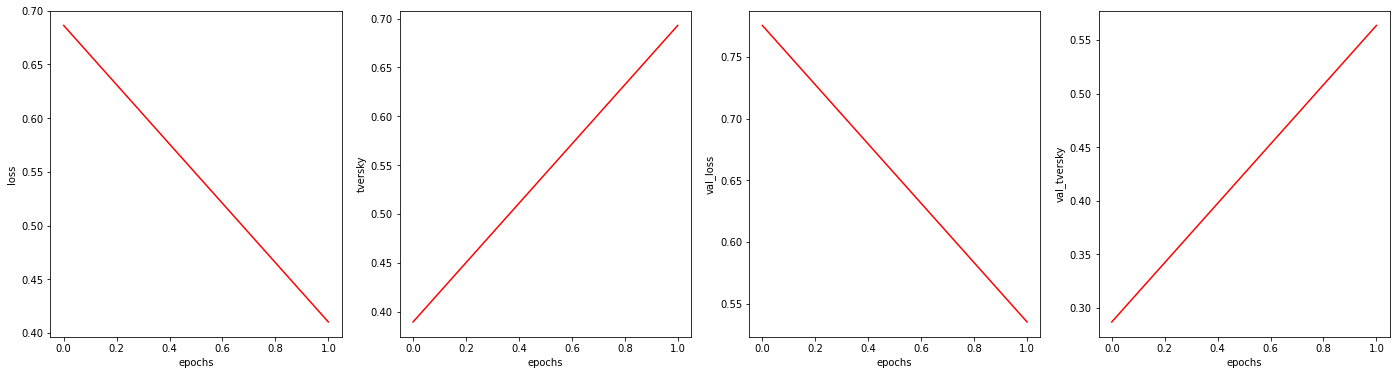

In [166]:
nrows, ncols = 1, 4
size_g = 6
fig = plt.gcf() 
fig.set_size_inches(ncols * size_g, nrows * size_g) 

for i, n in enumerate(history_3.history.keys()):
  sp = plt.subplot(nrows, ncols, i+1)    
  plt.plot(history_3.history[n], 'r', )
  plt.xlabel('epochs')
  plt.ylabel(n)

# 11: EVALUAR EL RENDIMIENTO DEL MODELO DE RESUNET DE SEGMENTACIÓN ENTRENADA
para realizar la evaluacion usaremos los modelos ya entrenados previamente (por fines de ahorrarnos el paso de entrenar y guardar pesos en nuestro almacenimiento)

crearemos una funcion para que apartir de darles un dataframe con el dataset de test + los 2 modelos (resnet-clasifier + resunet-segmentation) y nos regrese una lista con 'image_path','predicted_mask','has_mask"

In [35]:
#from utilities import focal_tversky, tversky_loss, tversky

with open('ResUNet-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()

# cargar la arquitectura del modelo
model_seg = tf.keras.models.model_from_json(json_savedModel)
model_seg.load_weights('weights_seg.hdf5')
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [191]:
def prediction(test, m_clasiffier, m_segmentation):  
  image_path= []
  predicted_mask= []
  has_mask= []
  indexs= []
  for i, i_dir in enumerate(test.image_path):
    # 1 preparamos X_input
    im = cv2.imread(i_dir) # convertimos la imagen a array (256,256,3)
    im= im * 1/255. # normalizamos 
    im = np.expand_dims(im, axis=0) # agregamos la dimencion del batch 
    # basados en brain_df aqui ya tendriamos listo un array (1,256,256,3) float64

    """ si procesaramos nuestra una imagen de internet tendriamos que añadir 2 pasos 
    img = cv2.resize(img,(256,256))
    img = np.array(img, dtype = np.float64)
    """
    # 2 suministramos classifier
    predict_1 = m_clasiffier.predict(im)
    # 3 interpretamos el output la clasificacion
    predict_1 = str(np.argmax(predict_1))

    predict_2 = "no_mask"
    if predict_1 == "1":
      # 4 preprocesamos la imagen para simular el datagen 
      im -= im.mean()
      im /= im.std()
      predict_2 = m_segmentation(im)
      # 5 interpretamos el output de segmentacion 
      predict_2 = np.array(predict_2)
      predict_2= predict_2.reshape((256,256))
      predict_2= predict_2 * 255.
    # 6 guardamos los resultados en listas 
    image_path.append(i_dir)
    predicted_mask.append(predict_2)
    has_mask.append(predict_1)
    indexs.append(test.index[i]) # los indices nos serviran para relacionar las imagenes al plotear
  return image_path, predicted_mask, has_mask, indexs 



In [192]:
image_id, mask, has_mask, indexs = prediction(test, model_1_trained, model_seg)
predict_df = pd.DataFrame({"image_path":image_id, "predicted_mask": mask, "has_mask": has_mask, "indexs": indexs})

In [193]:
predict_df = predict_df.set_index('indexs')

In [195]:
# filtramos solo los casos positivos a plotear 
predict_df_plt = predict_df[predict_df["has_mask"] == "1"]

"""# reiniciamos los indices para no tner problemas al hacer plot 
predict_df_plt= predict_df_plt.reset_index(drop=True)
test_df_plt= test_df_plt.reset_index(drop=True)"""

print(predict_df_plt.shape, test_df_plt.shape)

(190, 3) (209, 3)


In [ ]:
predict_df_plt.head()

In [ ]:
test.head()

# creamos una funcion para visuzlizar resultados finales


In [208]:
print(np.random.choice(list(predict_df_plt.index), 3))

[1822 1926 2282]


In [211]:
# la funcion acepta df simetricos 
def plt_final_imgs(true_df, pred_df, n_imgs= None, indices= None):
  if n_imgs != None:
    indices= np.random.choice(list(pred_df.index), n_imgs)
    
  for i in indices:
    if pred_df["has_mask"][i] == "1": # solo entrara cuando el sistema predijo positivo
      nrows, ncols = 1, 5
      size_g = 7
      fig = plt.gcf() 
      fig.set_size_inches(ncols * size_g, nrows * size_g)
      for a in range(1,6):
        sp = plt.subplot(nrows, ncols, a)
        if a == 1:
          plt_img(true_df, "image_path", i, title="input_img")
        elif a == 2:
          plt_img(true_df, "mask_path", i, title="true_mask")
        elif a == 3: 
          mascara = pred_df["predicted_mask"][i]
          plt.title("prediction")
          plt.imshow(mascara)
        elif a == 4:
          plt_img_2(true_df, i, title="true_")
        elif a == 5:
          img = io.imread(pred_df["image_path"][i]) 
          mascara = pred_df["predicted_mask"][i]
          img[mascara > 230] = (0,255,0)# debido a que los valores ahora no seran  255 ajustamos el umbral  
          plt.title("prediction")
          plt.imshow(img)

    plt.tight_layout() # para que se ajuste al tamaño y haga grande las imagenes al dar click
    plt.show()


In [212]:
plt_final_imgs(test, predict_df_plt, 5)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
"""# comaparamos la accuracy de validadcionde los 2 modelos 
nrows, ncols = 1, 4
size_g = 6
fig = plt.gcf() 
fig.set_size_inches(ncols * size_g, nrows * size_g) 

for i, n in enumerate(history_1.history.keys()):
  sp = plt.subplot(nrows, ncols, i+1)    
  plt.plot(history_1.history[n], 'r', label='no_augmention')
  plt.plot(history_2.history[n], 'b', label='augmentation')
  plt.xlabel('epochs')
  plt.ylabel(n)
  plt.legend()"""